
Thank you, Nirant!!!
https://www.kaggle.com/nirant/hitchhiker-s-guide-to-nlp-in-spacy/data



In [0]:
#!python -m spacy download en_core_web_lg
#nlp = spacy.load('en_core_web_lg')
# python -m spacy download en_vectors_web_lg

In [0]:
#!sudo -H pip3 install spacy

In [128]:
!pip install --upgrade pip
!pip install textacy

     |████████████████████████████████| 1.5MB 8.6MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 206 kB 8.1 MB/s 
     |████████████████████████████████| 475 kB 17.4 MB/s 
     |████████████████████████████████| 133 kB 20.2 MB/s 
     |████████████████████████████████| 3.0 MB 24.9 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1257670 sha256=325c0f83c18f18e640cf2393c7ebd8baa7a3b39102374643366e496c228dfff8
  Stored in directory: /root/.cache/pip/wheels/ae/29/ee/95cfb685f2f524674eec78a249f3439b33bbef131529eccc35
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=72997 sha256=d9ddd6e12a1ed98daae1e281cebedd3aabe7d0661b0ec0a1b42526599e788981
  Stored in directory: /root/.cache/pip/wheels/3b/de/5e/9a80586358562caf9f6b3913b998e45508b5748bce9a45d419
Successfully built cytoolz jellyfish


In [48]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [0]:
#Get the json file for the API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ewarmstrong0710","key":"15a9ec338aa588e0e7e5692a7205e7c4"}'}

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d davidg089/all-djtrum-tweets

100% 4.72M/4.72M [00:00<00:00, 27.3MB/s]



In [0]:
!unzip \*.zip

Archive:  all-djtrum-tweets.zip
  inflating: DJT_All_Tweets.CSV      
  inflating: all_djt_tweets.csv      


In [0]:
import spacy
import random
from collections import Counter #for counting
import seaborn as sns #for visualization
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')
sns.set(font_scale=2)
import json
def pretty_print(pp_object):
    print(json.dumps(pp_object, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [103]:
tweets = pd.read_csv("all_djt_tweets.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [105]:
explain_text_entities(tweets['text'][9])

Entity: Friday, Label: DATE, Absolute or relative dates or periods
Entity: Congratulations U.S.A., Label: ORG, Companies, agencies, institutions, etc.


In [106]:
one_sentence = tweets['text'][9]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [0]:
#Redacting Names
#1. find all PERSON names
#2. replace these by a filler like ["REDACTED"]


In [0]:
def redact_names(text):
    doc = nlp(text)
    redacted_sentence = []
    for ent in doc.ents:
        ent.merge()
    for token in doc:
        if token.ent_type_ == "PERSON":
            redacted_sentence.append("[REDACTED]")
        else:
            redacted_sentence.append(token.string)
    return "".join(redacted_sentence)

In [108]:
one_sentence = redact_names(tweets['text'][420])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

In [109]:
one_sentence = redact_names(tweets['text'][9])
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)


In [110]:
#noun chunks!
example_text = tweets['text'][9]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'Stock Market'
sentence 1 has noun chunk 'all time'
sentence 1 has noun chunk 'Friday'
sentence 2 has noun chunk 'Congratulations U.S.A.'


In [111]:
one_sentence = tweets['text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

Incredibly ADV
beautiful ADJ
ceremony NOUN
as SCONJ
U.S. PROPN
Korean PROPN
War PROPN
remains NOUN
are AUX
returned VERB
to ADP
American ADJ
soil NOUN
. PUNCT
Thank VERB
you PRON
to ADP
Honolulu PROPN
and CCONJ
all DET
of ADP
our DET
great ADJ
Military ADJ
participants NOUN
on ADP
a DET
job NOUN
well ADV
done VERB
. PUNCT
A DET
special ADJ
thanks NOUN
to ADP
Vice PROPN
President PROPN
Mike PROPN
Pence PROPN
on ADP
delivering VERB
a DET
truly ADV
magnificent ADJ
tribute NOUN
! PUNCT


In [0]:
text = tweets['text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [0]:
doc = nlp(text)


In [0]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

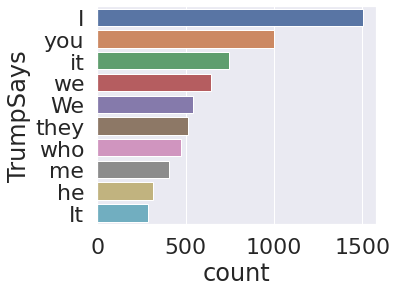

In [115]:
df_nouns = pd.DataFrame(items_of_interest, columns=["TrumpSays"])
plt.figure(figsize=(5,4))
sns.countplot(y="TrumpSays",
             data=df_nouns,
             order=df_nouns["TrumpSays"].value_counts().iloc[:10].index)
plt.show()

In [0]:
trump_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        trump_topics.append(token)
        
trump_topics = [str(x) for x in trump_topics]

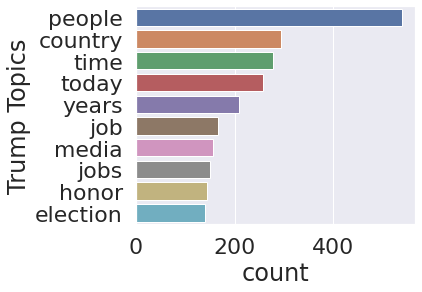

In [117]:
df_nouns = pd.DataFrame(trump_topics, columns=["Trump Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Topics",
             data=df_nouns,
             order=df_nouns["Trump Topics"].value_counts().iloc[:10].index)
plt.show()

In [0]:
trump_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        trump_topics.append(ent.text.strip())

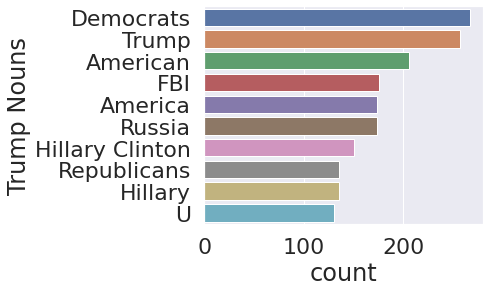

In [122]:
df_ttopics = pd.DataFrame(trump_topics, columns=["Trump Nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="Trump Nouns",
             data=df_ttopics,
             order=df_ttopics["Trump Nouns"].value_counts().iloc[0:10].index)
plt.show()

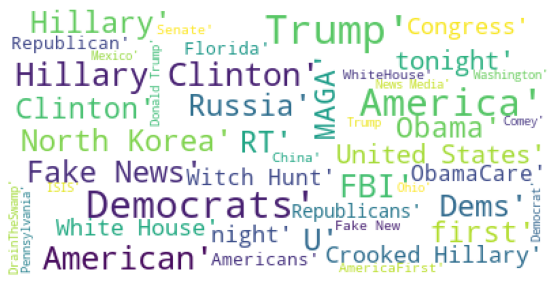

In [120]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
plt.figure(figsize=(10,5))
wordcloud = WordCloud(background_color="white",
                      stopwords = STOP_WORDS,
                      max_words=45,
                      max_font_size=30,
                      random_state=42
                     ).generate(str(trump_topics))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [123]:
from spacy.matcher import Matcher
# doc = nlp(text)
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    
# declare different patterns
russia_pattern = [{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
democrats_pattern = [{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]
i_pattern = [{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'},
           {'POS': 'ADJ'}]

matcher.add('DEMOCRATS', collect_sents, democrats_pattern)  # add pattern
matcher.add('RUSSIA', collect_sents, russia_pattern)  # add pattern
matcher.add('I', collect_sents, i_pattern)  # add pattern
matches = matcher(doc)

spacy.displacy.render(matched_sents, style='ent', manual=True, jupyter=True,  options = {'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

In [0]:
example_text = tweets['text'][180]
doc = nlp(example_text)

In [125]:
options = {'compact': True, 'bg': '#09a3d5',
           'color': 'white', 'font': 'Trebuchet MS'}
spacy.displacy.render(doc, jupyter=True, style='dep', options=options)

In [126]:
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
          [child for child in token.children])

Wacky compound Omarosa PROPN []
Omarosa nsubj has AUX [Wacky]
already advmod has AUX []
has ROOT has AUX [Omarosa, already, Agreement, !]
a det Agreement PROPN []
fully advmod signed VERB []
signed amod Agreement PROPN [fully]
Non dep - PROPN []
- dep Disclosure PROPN [Non]
Disclosure compound Agreement PROPN [-]
Agreement dobj has AUX [a, signed, Disclosure]
! punct has AUX []


In [0]:
from textacy.spacier import utils as spacy_utils

def para_to_ques(eg_text):
    """
    Generates a few simple questions by slot filling pieces from sentences
    """
    doc = nlp(eg_text)
    results = []
    for sentence in doc.sents:
        root = sentence.root
        ask_about = spacy_utils.get_subjects_of_verb(root)
        answers = spacy_utils.get_objects_of_verb(root)
        if len(ask_about) > 0 and len(answers) > 0:
            if root.lemma_ == "be":
                question = f'What {root} {ask_about[0]}?'
            else:
                question = f'What does {ask_about[0]} {root.lemma_}?'
            results.append({'question':question, 'answers':answers})
    return results

In [133]:
example_text = tweets['text'][186]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)
print(para_to_ques(example_text))

[{'question': 'What does People hate?', 'answers': [her]}, {'question': 'What does I see?', 'answers': [her]}]
